In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\sjmp1s\OneDrive - Aptiv\Documents\Time_Series\Lessons\airline_passengers.csv' \
            ,index_col='Month',parse_dates=True)

In [3]:
df.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
alpha = 0.2

<AxesSubplot:xlabel='Month'>

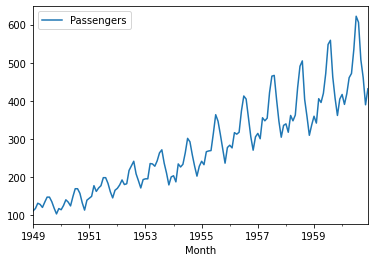

In [4]:
df.plot()

In [ ]:
!pip install -U statsmodels

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [8]:
ses = SimpleExpSmoothing(df['Passengers'])

C:\Users\sjmp1s\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
df.index.freq='MS'

In [11]:
ses = SimpleExpSmoothing(df['Passengers'],initialization_method='legacy-heuristic')

In [13]:
res = ses.fit(smoothing_level=alpha,optimized=False)

In [14]:
res

In [15]:
res.predict(start=df.index[0],end=df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [16]:
df['SES'] = res.predict(start=df.index[0],end=df.index[-1])

In [17]:
np.allclose(df['SES'],res.fittedvalues)

True

<AxesSubplot:xlabel='Month'>

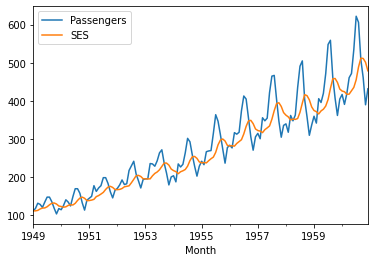

In [18]:
df.plot()

In [19]:
df.head()

,Passengers,SES
Month,,
1949-01-01,112,112.000
1949-02-01,118,112.000
1949-03-01,132,113.200
1949-04-01,129,116.960
1949-05-01,121,119.368


In [20]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [27]:
ses = SimpleExpSmoothing(train['Passengers'],
                        initialization_method='legacy-heuristic')
res = ses.fit()

In [24]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

<AxesSubplot:xlabel='Month'>

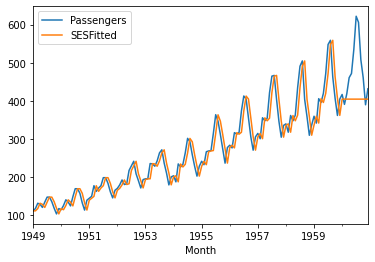

In [28]:
df.loc[train_idx,'SESFitted'] = res.fittedvalues
df.loc[test_idx,'SESFitted'] = res.forecast(N_test)
df[['Passengers','SESFitted']].plot()

In [30]:
res.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}